In [15]:
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession
from visual_behavior.data_access import loading
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [52]:
oeid = 908350502

In [53]:
session= BehaviorOphysSession(oeid)

In [54]:
dataset = loading.get_ophys_dataset(oeid)

extracting cached data from 908350502_461946_190717_VISp_175_Slc17a7-IRES2-Cre_2P5_behavior_6imagesAretake


In [55]:
dataset.metadata

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


{'rig_name': 'CAM2P.5',
 'sex': 'F',
 'age': 'P136',
 'excitation_lambda': 910.0,
 'emission_lambda': 520.0,
 'indicator': 'GCAMP6f',
 'field_of_view_width': 447,
 'field_of_view_height': 512,
 'ophys_experiment_id': 908350502,
 'experiment_container_id': 895259496,
 'ophys_frame_rate': 31.0,
 'stimulus_frame_rate': 60.0,
 'targeted_structure': 'VISp',
 'imaging_depth': 175,
 'session_type': 'OPHYS_6_images_A',
 'experiment_datetime': Timestamp('2019-07-17 15:48:21+0000', tz='UTC'),
 'reporter_line': ['Ai93(TITL-GCaMP6f)'],
 'driver_line': ['Camk2a-tTA', 'Slc17a7-IRES2-Cre'],
 'full_genotype': 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'behavior_session_uuid': UUID('79a166b0-34ae-450a-9c11-33523a530687'),
 'imaging_plane_group': None,
 'donor_id': 461946,
 'behavior_session_id': 908065760}

In [56]:
neuropil = loading.get_neuropil_traces_array(oeid)

In [59]:
movie = loading.load_motion_corrected_movie(oeid)

In [62]:
avg_movie = np.mean(movie, axis=(1,2))

In [57]:
np.shape(neuropil)

(160, 140280)

<IPython.core.display.Javascript object>


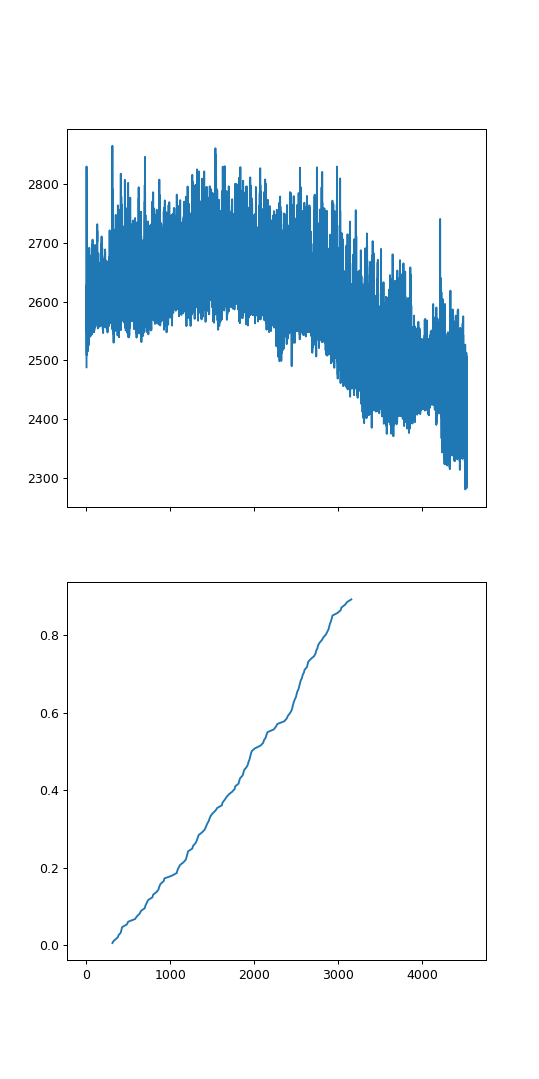

In [63]:
fig,ax=plt.subplots(2,1,sharex=True,figsize=(6,12))
ax[0].plot(dataset.ophys_timestamps, avg_movie)
ax[1].plot(
    dataset.rewards['timestamps'], 
    dataset.rewards['volume'].cumsum())

In [37]:
dataset.rewards['volume'].cumsum()

0      0.005
1      0.010
2      0.015
3      0.020
4      0.025
       ...  
149    1.040
150    1.047
151    1.054
152    1.061
153    1.068
Name: volume, Length: 154, dtype: float64